In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns

In [64]:
history = []
y_pred = []
y_truth = []

for i in tqdm.tqdm(range(12)):
    hist = np.load(f"../data/history_final_model_fold{i}.npy", allow_pickle=True).item()
    y_p = np.loadtxt(f"../data/y_pred_final_fold{i}.csv", unpack=True)
    y_t = np.loadtxt(f"../data/y_true_final_fold{i}.csv", unpack=True)

    history.append(hist)
    y_pred.append(y_p)
    y_truth.append(y_t)

100%|██████████| 12/12 [00:00<00:00, 120.36it/s]


In [65]:
history = np.array(history)
print(history[0].keys())

dict_keys(['AUC', 'Precision', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_accuracy', 'val_loss'])


In [66]:
losses = np.zeros(16)
val_losses = np.zeros(16)
precision = np.zeros(16)
val_precision = np.zeros(16)

for i in range(12):
    losses = np.concatenate([losses, np.array(history[i]["loss"][:16])])
    val_losses = np.concatenate([val_losses, np.array(history[i]["val_loss"][:16])])
    precision = np.concatenate([precision, np.array(history[i]["Precision"][:16])])
    val_precision = np.concatenate([val_precision, np.array(history[i]["val_Precision"][:16])])

In [67]:
losses = np.reshape(losses, (13, 16))
val_losses = np.reshape(val_losses, (13, 16))
precision = np.reshape(precision, (13, 16))
val_precision = np.reshape(val_precision, (13, 16))

losses = np.delete(losses, 0, axis=0)
val_losses = np.delete(val_losses, 0, axis=0)
precision = np.delete(precision, 0, axis=0)
val_precision = np.delete(val_precision, 0, axis=0)

mean_losses = np.mean(losses, axis=0)
mean_val_losses = np.mean(val_losses, axis=0)
mean_precision = np.mean(precision, axis=0)
mean_val_precision = np.mean(val_precision, axis=0)


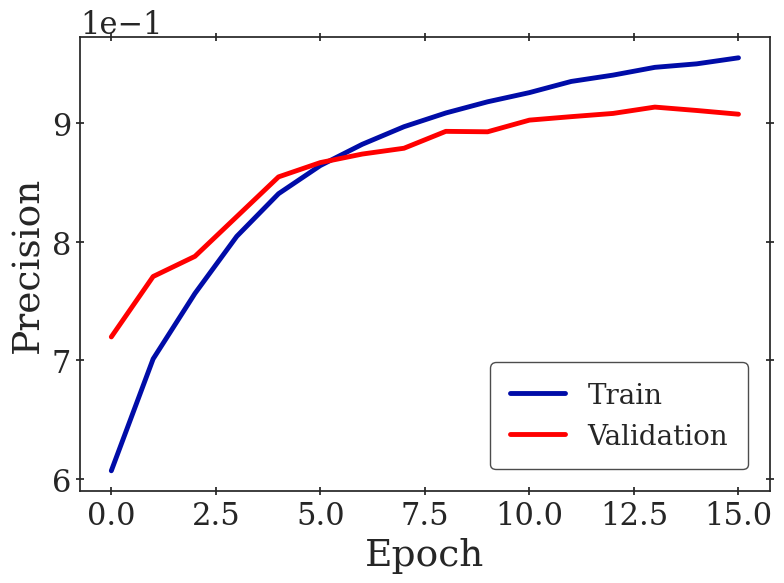

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style="white", palette="pastel", font = 'serif', )

sns.lineplot(mean_precision, label="Train",
            color='#000ca8',
            #alpha=0.8,
            legend=True,
            #edgecolor='black',
            linewidth=3.5,
            )
sns.lineplot(mean_val_precision, label="Validation",
            color='red',
            #alpha=0.8,
            legend=True,
            #edgecolor='black',
            linewidth=3.5,
            )

#sns.kdeplot(lambda_param_values_nJet0, color='red', linewidth=1.5, clip=(-1, 1), alpha=1)

plt.xlabel("Epoch", fontsize=27)
plt.ylabel("Precision", fontsize=27)

plt.tick_params(axis='both', which='major', labelsize=22, bottom=True, top=True, left=True, right=True, direction='inout')
plt.legend(
    fontsize='20',
    fancybox=True,
    borderpad=0.7,
    frameon=True,
    framealpha=0.7,
    facecolor='white',
    edgecolor='black',
    borderaxespad=0.8
)
#plt.title(r'$\mathbf{H\to WW^* \to e\nu \mu\nu}$' + '\n', fontsize=22)
#plt.text(0.5, 1.05, r'$\sqrt{s}=13$ TeV, $L_{\mathrm{int}}=$ 139 fb$^{-1}$', fontsize=20, ha='center', va='center', transform=ax.transAxes)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_fontsize(22)
plt.tight_layout()
plt.savefig("../plots/prec.pdf")

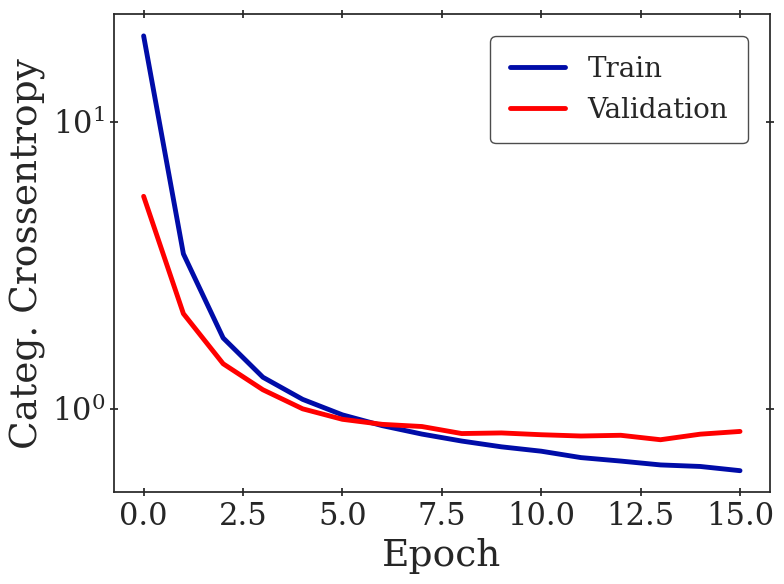

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style="white", palette="pastel", font = 'serif', )

sns.lineplot(mean_losses, label="Train",
            color='#000ca8',
            #alpha=0.8,
            legend=True,
            #edgecolor='black',
            linewidth=3.5,
            )
sns.lineplot(mean_val_losses, label="Validation",
            color='red',
            #alpha=0.8,
            legend=True,
            #edgecolor='black',
            linewidth=3.5,
            )

#sns.kdeplot(lambda_param_values_nJet0, color='red', linewidth=1.5, clip=(-1, 1), alpha=1)

plt.xlabel("Epoch", fontsize=27)
plt.ylabel("Categ. Crossentropy", fontsize=27)

plt.tick_params(axis='both', which='major', labelsize=22, bottom=True, top=True, left=True, right=True, direction='inout')
plt.legend(
    fontsize='20',
    fancybox=True,
    borderpad=0.7,
    frameon=True,
    framealpha=0.7,
    facecolor='white',
    edgecolor='black',
    borderaxespad=0.8
)
#plt.title(r'$\mathbf{H\to WW^* \to e\nu \mu\nu}$' + '\n', fontsize=22)
#plt.text(0.5, 1.05, r'$\sqrt{s}=13$ TeV, $L_{\mathrm{int}}=$ 139 fb$^{-1}$', fontsize=20, ha='center', va='center', transform=ax.transAxes)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.yscale("log")
plt.gca().yaxis.get_offset_text().set_fontsize(22)
plt.tight_layout()
plt.savefig("../plots/loss.pdf")

final und crossval

In [70]:
from sklearn.metrics import classification_report

y_pred = np.array([i[:1000] for i in y_pred])
y_truth = np.array([i[:1000] for i in y_truth])

In [71]:
y_pred = np.reshape(y_pred, (12000))
y_truth = np.reshape(y_truth, (12000))

In [76]:
print(classification_report(y_truth, y_pred, target_names=["Dangerous", "Distracted", "Drinkig", "Safe", "Sleepy", "Yawn"]))

              precision    recall  f1-score   support

   Dangerous       0.96      0.94      0.95      2003
  Distracted       0.87      0.88      0.88      2000
     Drinkig       0.94      0.96      0.95      1998
        Safe       0.85      0.84      0.85      2000
      Sleepy       0.89      0.90      0.90      2000
        Yawn       0.94      0.95      0.95      1999

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [79]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_truth, y_pred))

0.9115833333333333


In [80]:
y_pred_olddata = np.load("../data/y_pred_final_olddata.npy")
y_truth_olddata = np.load("../data/y_true_final_olddata.npy")

In [81]:
print(classification_report(y_truth_olddata, y_pred_olddata, target_names=["Dangerous", "Distracted", "Drinkig", "Safe", "Sleepy", "Yawn"]))

              precision    recall  f1-score   support

   Dangerous       0.97      0.97      0.97       301
  Distracted       0.87      0.90      0.88       152
     Drinkig       0.71      0.68      0.69        25
        Safe       0.94      0.93      0.94       412
      Sleepy       0.86      0.91      0.89        69
        Yawn       1.00      0.88      0.94        26

    accuracy                           0.93       985
   macro avg       0.89      0.88      0.89       985
weighted avg       0.93      0.93      0.93       985

